In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Foamboard/complex_data_train.xlsx')
data

,realPart_1,realPart_2,realPart_3,realPart_4,realPart_5,realPart_6,realPart_7,realPart_8,realPart_9,imaginaryPart_1,imaginaryPart_2,imaginaryPart_3,imaginaryPart_4,imaginaryPart_5,imaginaryPart_6,imaginaryPart_7,imaginaryPart_8,imaginaryPart_9
0,1.007849,0.969037,1.024370,1.020319,0.946247,1.137603,0.988407,0.928262,0.950598,-0.036472,0.048375,-0.013672,-0.010831,0.021401,-0.040638,0.019689,0.011398,0
1,1.014953,0.971555,1.028704,1.021329,0.944720,1.131834,0.981415,0.926503,0.926972,-0.039215,0.047689,-0.005834,-0.005610,0.023393,-0.039919,0.011036,0.008228,0
2,1.006961,0.969038,1.026541,1.011469,0.947114,1.137122,0.984167,0.939500,0.914930,-0.036946,0.049629,-0.008616,-0.011228,0.022735,-0.038102,0.014333,0.007815,0
3,1.008017,0.966748,1.027967,1.016508,0.949179,1.139574,0.982015,0.932956,0.883169,-0.036693,0.051222,-0.009646,-0.004815,0.021302,-0.045219,0.014656,0.008746,0
4,1.011708,0.970528,1.029756,1.021974,0.949140,1.137948,0.972849,0.930401,0.905443,-0.038893,0.047733,-0.010975,-0.007662,0.024319,-0.039880,0.016001,0.008950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34170,1.064226,0.982698,1.076100,0.994657,0.964176,1.106229,0.871427,0.945673,0.941485,-0.032328,0.048418,-0.005560,-0.000035,0.001998,-0.030809,0.024011,-0.006888,0
34171,1.054993,0.974777,1.078024,0.997593,0.967279,1.113956,0.890118,0.935226,0.952207,-0.036753,0.047742,-0.009009,0.006049,0.007225,-0.039737,0.024404,-0.000891,0
34172,1.059890,0.981977,1.065516,0.998982,0.967444,1.105759,0.883269,0.946050,0.928207,-0.043242,0.047024,-0.006313,-0.006848,0.004119,-0.031992,0.030019,0.006624,0
34173,1.051640,0.974364,1.078555,0.995045,0.959843,1.117277,0.886355,0.950338,0.953459,-0.040171,0.056989,0.002291,0.007438,0.007342,-0.042583,0.019768,-0.012641,0


In [ ]:
X_train = data.iloc[:, :-1]
X_train = X_train.astype(float)
X_train

,realPart_1,realPart_2,realPart_3,realPart_4,realPart_5,realPart_6,realPart_7,realPart_8,realPart_9,imaginaryPart_1,imaginaryPart_2,imaginaryPart_3,imaginaryPart_4,imaginaryPart_5,imaginaryPart_6,imaginaryPart_7,imaginaryPart_8
0,1.007849,0.969037,1.024370,1.020319,0.946247,1.137603,0.988407,0.928262,0.950598,-0.036472,0.048375,-0.013672,-0.010831,0.021401,-0.040638,0.019689,0.011398
1,1.014953,0.971555,1.028704,1.021329,0.944720,1.131834,0.981415,0.926503,0.926972,-0.039215,0.047689,-0.005834,-0.005610,0.023393,-0.039919,0.011036,0.008228
2,1.006961,0.969038,1.026541,1.011469,0.947114,1.137122,0.984167,0.939500,0.914930,-0.036946,0.049629,-0.008616,-0.011228,0.022735,-0.038102,0.014333,0.007815
3,1.008017,0.966748,1.027967,1.016508,0.949179,1.139574,0.982015,0.932956,0.883169,-0.036693,0.051222,-0.009646,-0.004815,0.021302,-0.045219,0.014656,0.008746
4,1.011708,0.970528,1.029756,1.021974,0.949140,1.137948,0.972849,0.930401,0.905443,-0.038893,0.047733,-0.010975,-0.007662,0.024319,-0.039880,0.016001,0.008950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34170,1.064226,0.982698,1.076100,0.994657,0.964176,1.106229,0.871427,0.945673,0.941485,-0.032328,0.048418,-0.005560,-0.000035,0.001998,-0.030809,0.024011,-0.006888
34171,1.054993,0.974777,1.078024,0.997593,0.967279,1.113956,0.890118,0.935226,0.952207,-0.036753,0.047742,-0.009009,0.006049,0.007225,-0.039737,0.024404,-0.000891
34172,1.059890,0.981977,1.065516,0.998982,0.967444,1.105759,0.883269,0.946050,0.928207,-0.043242,0.047024,-0.006313,-0.006848,0.004119,-0.031992,0.030019,0.006624
34173,1.051640,0.974364,1.078555,0.995045,0.959843,1.117277,0.886355,0.950338,0.953459,-0.040171,0.056989,0.002291,0.007438,0.007342,-0.042583,0.019768,-0.012641


In [ ]:
y_train = pd.read_excel('/content/drive/MyDrive/Foamboard/raml_train_label.xlsx')
y_train

,label_cell_train
0,3.26
1,3.26
2,3.26
3,3.26
4,3.26
...,...
34170,24.92
34171,24.92
34172,24.92
34173,24.92


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (27340, 17)
y_train shape: (27340, 1)
X_val shape: (6835, 17)
y_val shape: (6835, 1)


In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/Foamboard/complex_data_test.xlsx')
data1

,realPart_1,realPart_2,realPart_3,realPart_4,realPart_5,realPart_6,realPart_7,realPart_8,realPart_9,imaginaryPart_1,imaginaryPart_2,imaginaryPart_3,imaginaryPart_4,imaginaryPart_5,imaginaryPart_6,imaginaryPart_7,imaginaryPart_8,imaginaryPart_9
0,1.012305,0.972172,1.026296,1.016650,0.947847,1.134835,0.982323,0.930380,0.937685,-0.039164,0.046862,-0.009439,-0.006971,0.024779,-0.040048,0.016395,0.007235,0
1,1.010253,0.970553,1.027181,1.019135,0.948038,1.137131,0.982069,0.928219,0.863446,-0.035757,0.050164,-0.010056,-0.008772,0.023683,-0.045929,0.016871,0.009243,0
2,1.013463,0.970150,1.024490,1.018884,0.948555,1.134773,0.978121,0.931944,0.952193,-0.034074,0.049585,-0.007781,-0.006668,0.018893,-0.043144,0.013264,0.009417,0
3,1.011341,0.970021,1.030543,1.014267,0.945452,1.142302,0.971199,0.934699,0.929501,-0.035443,0.050181,-0.009457,-0.008126,0.019987,-0.038488,0.014658,0.006232,0
4,1.012419,0.970239,1.029625,1.017302,0.950364,1.143033,0.972054,0.930408,0.967928,-0.034907,0.047643,-0.008541,-0.006486,0.018578,-0.040765,0.012930,0.011066,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,1.063297,0.981662,1.076662,1.000690,0.965119,1.108193,0.869906,0.940977,0.933208,-0.035661,0.057211,0.001235,-0.004616,0.005428,-0.036860,0.017023,-0.004952,0
8542,1.061020,0.988689,1.079395,0.992760,0.965000,1.105698,0.879946,0.931427,0.948163,-0.040387,0.049262,-0.006416,-0.009023,0.010203,-0.029657,0.028731,-0.003835,0
8543,1.053694,0.983957,1.078594,0.992842,0.964894,1.105321,0.884878,0.943180,0.902906,-0.037860,0.050049,0.001889,0.003491,0.009059,-0.043251,0.022829,-0.007579,0
8544,1.060048,0.979325,1.082809,0.992145,0.957731,1.109845,0.876148,0.950331,0.945208,-0.039420,0.046810,-0.009891,0.001551,0.009389,-0.034904,0.020801,0.004943,0


In [ ]:
X_test = data1.iloc[:, :-1]
X_test = X_test.astype(float)

X_test

,realPart_1,realPart_2,realPart_3,realPart_4,realPart_5,realPart_6,realPart_7,realPart_8,realPart_9,imaginaryPart_1,imaginaryPart_2,imaginaryPart_3,imaginaryPart_4,imaginaryPart_5,imaginaryPart_6,imaginaryPart_7,imaginaryPart_8
0,1.012305,0.972172,1.026296,1.016650,0.947847,1.134835,0.982323,0.930380,0.937685,-0.039164,0.046862,-0.009439,-0.006971,0.024779,-0.040048,0.016395,0.007235
1,1.010253,0.970553,1.027181,1.019135,0.948038,1.137131,0.982069,0.928219,0.863446,-0.035757,0.050164,-0.010056,-0.008772,0.023683,-0.045929,0.016871,0.009243
2,1.013463,0.970150,1.024490,1.018884,0.948555,1.134773,0.978121,0.931944,0.952193,-0.034074,0.049585,-0.007781,-0.006668,0.018893,-0.043144,0.013264,0.009417
3,1.011341,0.970021,1.030543,1.014267,0.945452,1.142302,0.971199,0.934699,0.929501,-0.035443,0.050181,-0.009457,-0.008126,0.019987,-0.038488,0.014658,0.006232
4,1.012419,0.970239,1.029625,1.017302,0.950364,1.143033,0.972054,0.930408,0.967928,-0.034907,0.047643,-0.008541,-0.006486,0.018578,-0.040765,0.012930,0.011066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,1.063297,0.981662,1.076662,1.000690,0.965119,1.108193,0.869906,0.940977,0.933208,-0.035661,0.057211,0.001235,-0.004616,0.005428,-0.036860,0.017023,-0.004952
8542,1.061020,0.988689,1.079395,0.992760,0.965000,1.105698,0.879946,0.931427,0.948163,-0.040387,0.049262,-0.006416,-0.009023,0.010203,-0.029657,0.028731,-0.003835
8543,1.053694,0.983957,1.078594,0.992842,0.964894,1.105321,0.884878,0.943180,0.902906,-0.037860,0.050049,0.001889,0.003491,0.009059,-0.043251,0.022829,-0.007579
8544,1.060048,0.979325,1.082809,0.992145,0.957731,1.109845,0.876148,0.950331,0.945208,-0.039420,0.046810,-0.009891,0.001551,0.009389,-0.034904,0.020801,0.004943


In [ ]:
y_test = pd.read_excel('/content/drive/MyDrive/Foamboard/raml_test_label.xlsx')
y_test

,label_cell_val
0,3.26
1,3.26
2,3.26
3,3.26
4,3.26
...,...
8541,24.92
8542,24.92
8543,24.92
8544,24.92


In [ ]:
from tensorflow.keras.layers import concatenate

def inception_module(x, filters):
    # 1x1 convolution branch
    branch1x1 = Conv1D(filters[0], 1, activation='relu', padding='same')(x)

    # 3x3 convolution branch
    branch3x3 = Conv1D(filters[1], 1, activation='relu', padding='same')(x)
    branch3x3 = Conv1D(filters[2], 3, activation='relu', padding='same')(branch3x3)

    # 5x5 convolution branch
    branch5x5 = Conv1D(filters[3], 1, activation='relu', padding='same')(x)
    branch5x5 = Conv1D(filters[4], 5, activation='relu', padding='same')(branch5x5)

    # Concatenate branches
    x = concatenate([branch1x1, branch3x3, branch5x5], axis=-1)

    return x

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, Flatten, Dense, ZeroPadding1D

def unet_inception(input_shape):
    # Encoder
    inputs = Input(shape=input_shape)

    # Inception module
    inception = inception_module(inputs, [128, 96, 128, 96, 128])

    conv1 = Conv1D(64, 3, activation='relu', padding='same')(inception)
    conv1 = Conv1D(128, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(128, 5, activation='relu', padding='same')(pool1)
    conv2 = Conv1D(128, 5, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling1D(pool_size=2)(conv2)

    conv3 = Conv1D(256, 7, activation='relu', padding='same')(pool2)
    conv3 = Conv1D(256, 7, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling1D(pool_size=2)(conv3)

    # Decoder
    up4 = UpSampling1D(size=2)(pool3)
    concat4 = concatenate([up4, conv3], axis=-1)
    conv4 = Conv1D(256, 7, activation='relu', padding='same')(concat4)
    conv4 = Conv1D(256, 7, activation='relu', padding='same')(conv4)

    up5 = UpSampling1D(size=2)(conv4)
    concat5 = concatenate([up5, conv2], axis=-1)
    conv5 = Conv1D(128, 5, activation='relu', padding='same')(concat5)
    conv5 = Conv1D(128, 5, activation='relu', padding='same')(conv5)

    up6 = UpSampling1D(size=2)(conv5)
    padding = ZeroPadding1D(padding=(0, 1))(up6)
    concat6 = concatenate([padding, conv1], axis=-1)
    conv6 = Conv1D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv1D(64, 3, activation='relu', padding='same')(conv6)

    flatten = Flatten()(conv6)


    dense4 = Dense(128, activation='relu')(flatten)
    dense5 = Dense(64, activation='relu')(dense4)
    dense6 = Dense(32, activation='relu')(dense5)
    dense7 = Dense(16, activation='relu')(dense6)

    # Output layer for regression
    outputs = Dense(1, activation='linear')(dense7)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

reg_model = unet_inception(input_shape=(17, 1))

learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
reg_model.compile(loss='mean_absolute_error', optimizer= optimizer)

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

In [ ]:
reg_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/50
855/855 [==============================] - 33s 15ms/step - loss: 3.2058 - val_loss: 1.7754
Epoch 2/50
855/855 [==============================] - 11s 13ms/step - loss: 1.8028 - val_loss: 1.5652
Epoch 3/50
855/855 [==============================] - 11s 13ms/step - loss: 1.4398 - val_loss: 1.2327
Epoch 4/50
855/855 [==============================] - 12s 14ms/step - loss: 1.2122 - val_loss: 1.0903
Epoch 5/50
855/855 [==============================] - 11s 13ms/step - loss: 1.1560 - val_loss: 1.2851
Epoch 6/50
855/855 [==============================] - 11s 13ms/step - loss: 1.1209 - val_loss: 1.0548
Epoch 7/50
855/855 [==============================] - 12s 14ms/step - loss: 1.1093 - val_loss: 1.0076
Epoch 8/50
855/855 [==============================] - 11s 13ms/step - loss: 1.1240 - val_loss: 1.0122
Epoch 9/50
855/855 [==============================] - 12s 14ms/step - loss: 1.0847 - val_loss: 1.9947
Epoch 10/50
855/855 [==============================] - 12s 14ms/step - loss: 1.120

In [ ]:
from tensorflow.keras.models import load_model

custom_objects = {'custom_loss': custom_loss}
with tf.keras.utils.custom_object_scope(custom_objects):
    # Load the best model
    best_model = load_model('best_model.h5')

# Evaluate on test data
test_results = best_model.evaluate(X_test, y_test)

# Extract MAE and MSE from the test results
test_mae = test_results[1]
test_mse = test_results[2]

print("Test MAE:", test_mae)
print("Test MSE:", test_mse)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.h5')

# Evaluate on test data
test_loss = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
y_test = y_test.to_numpy().flatten()
# Load the best model
best_model = load_model('best_model.h5')

# Evaluate on test data
test_loss = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

# Generate predictions on test data
predictions = best_model.predict(X_test)

predictions = predictions.flatten()
y_test = y_test.flatten()

# Create a dictionary to store predictions by value
predictions_by_value = {}

268/268 [==============================] - 2s 5ms/step - loss: 0.8577
Test loss: 0.857746958732605
268/268 [==============================] - 1s 3ms/step


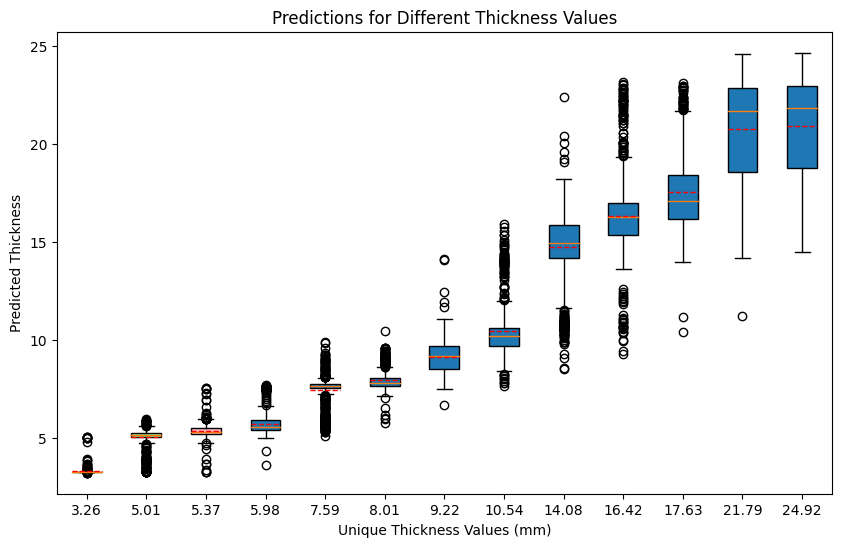

In [ ]:
for value in np.unique(y_test):
    value_indices = np.where(y_test == value)[0]
    value_predictions = predictions[value_indices]
    predictions_by_value[value] = value_predictions

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each box plot
box_data = [value_predictions for value_predictions in predictions_by_value.values()]
box = ax.boxplot(box_data, showmeans=True, meanline=True, patch_artist=True)

# Set box plot colors
colors = ['lightblue', 'lightgreen', 'lightpink']  # Customize colors as needed
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set X-axis tick positions and labels
ticks = np.arange(1, len(np.unique(y_test)) + 1)
ax.set_xticks(ticks)
ax.set_xticklabels(np.unique(y_test))

# Set labels and title
ax.set_xlabel('Unique Thickness Values (mm)')
ax.set_ylabel('Predicted Thickness')
plt.title('Predictions for Different Thickness Values')

# Add mean line as dotted line
for line in box['means']:
    line.set_linestyle('--')
    line.set_color('red')

# Show the figure
plt.show()
